# Data Import

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

if os.getcwd() == '/content':
    base_path = '/content/drive/MyDrive/Colab Notebooks/TIL/data/energy/'
else:
    base_path = os.getcwd() + '/data/energy/'

print(base_path)

/content/drive/MyDrive/Colab Notebooks/TIL/data/energy/


In [89]:
sample = pd.read_csv(base_path + 'sample_submission.csv')
train = pd.read_csv(base_path + 'train.csv', encoding='cp949')
test = pd.read_csv(base_path + 'test.csv', encoding='cp949')

In [90]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [91]:
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Preprocessing with EDA

- 예측기간은 예보자료를 활용했기 때문에 3,6시간 단위로 짤려있다.

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


1. 기온, 풍속, 습도, 일조 : 3시간에 한번 측정
2. 강수량 : 6시간에 한번씩 측정

So, 위 5개 컬럼은 fillna('ffill')을 통해 결측값을 채워준다.

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [94]:
train.date_time.str.split(' ', expand=True)[0]

0         2020-06-01
1         2020-06-01
2         2020-06-01
3         2020-06-01
4         2020-06-01
             ...    
122395    2020-08-24
122396    2020-08-24
122397    2020-08-24
122398    2020-08-24
122399    2020-08-24
Name: 0, Length: 122400, dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_

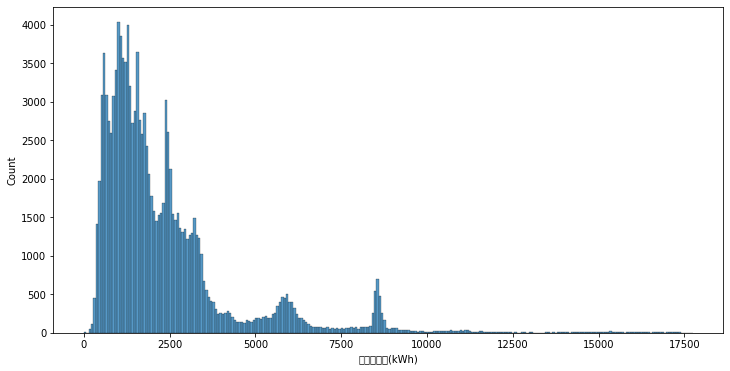

In [95]:
# target distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='전력사용량(kWh)')

In [96]:
# num	date_time	기온(°C)	풍속(m/s)	습도(%)	강수량(mm, 6시간)	일조(hr, 3시간)	비전기냉방설비운영	태양광보유
train_eng_col = ['num', 'datetime', 'power', 'temp', 'windspeed', 'humid', 'rain', 'insol', 'cooling', 'solarpanel']
test_eng_col = ['num', 'datetime', 'temp', 'windspeed', 'humid', 'rain', 'insol', 'cooling', 'solarpanel']
# train.columns = eng_col
train.columns = train_eng_col
test.columns = test_eng_col
train

,num,datetime,power,temp,windspeed,humid,rain,insol,cooling,solarpanel
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [97]:
train[train.power > 12500]

,num,datetime,power,temp,windspeed,humid,rain,insol,cooling,solarpanel
14294,8,2020-06-01 14,12991.52430,25.3,2.3,32.0,0.0,1.0,1.0,1.0
14295,8,2020-06-01 15,12917.37060,25.4,2.8,33.0,0.0,1.0,1.0,1.0
14296,8,2020-06-01 16,12809.80245,25.3,3.6,27.0,0.0,1.0,1.0,1.0
14342,8,2020-06-03 14,13642.90380,26.6,1.4,50.0,0.0,0.9,1.0,1.0
14343,8,2020-06-03 15,14143.04460,27.3,1.6,48.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16313,8,2020-08-24 17,17136.35100,31.6,1.0,57.0,0.0,1.0,1.0,1.0
16314,8,2020-08-24 18,12642.34955,30.1,0.7,68.0,0.0,1.0,1.0,1.0
77245,38,2020-08-13 13,12607.56000,29.1,3.7,78.0,0.0,0.0,1.0,1.0
77246,38,2020-08-13 14,12549.60000,29.6,3.0,77.0,0.0,0.0,1.0,1.0


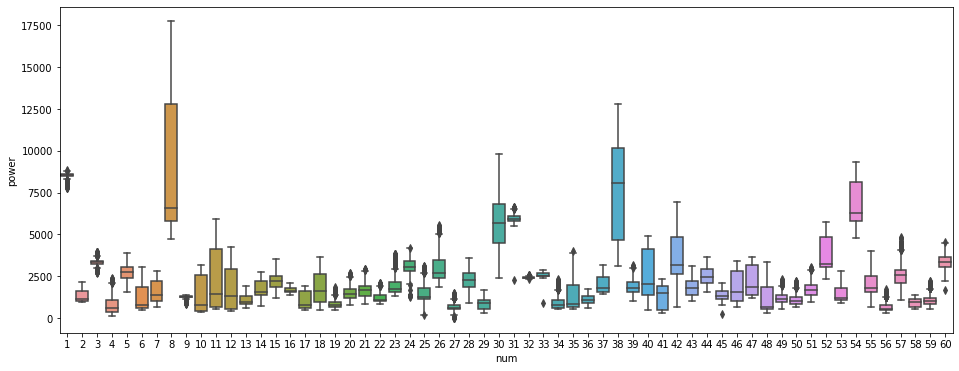

In [98]:
plt.figure(figsize=(16,6))
sns.boxplot(data=train, x='num', y='power')
plt.show()

In [99]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

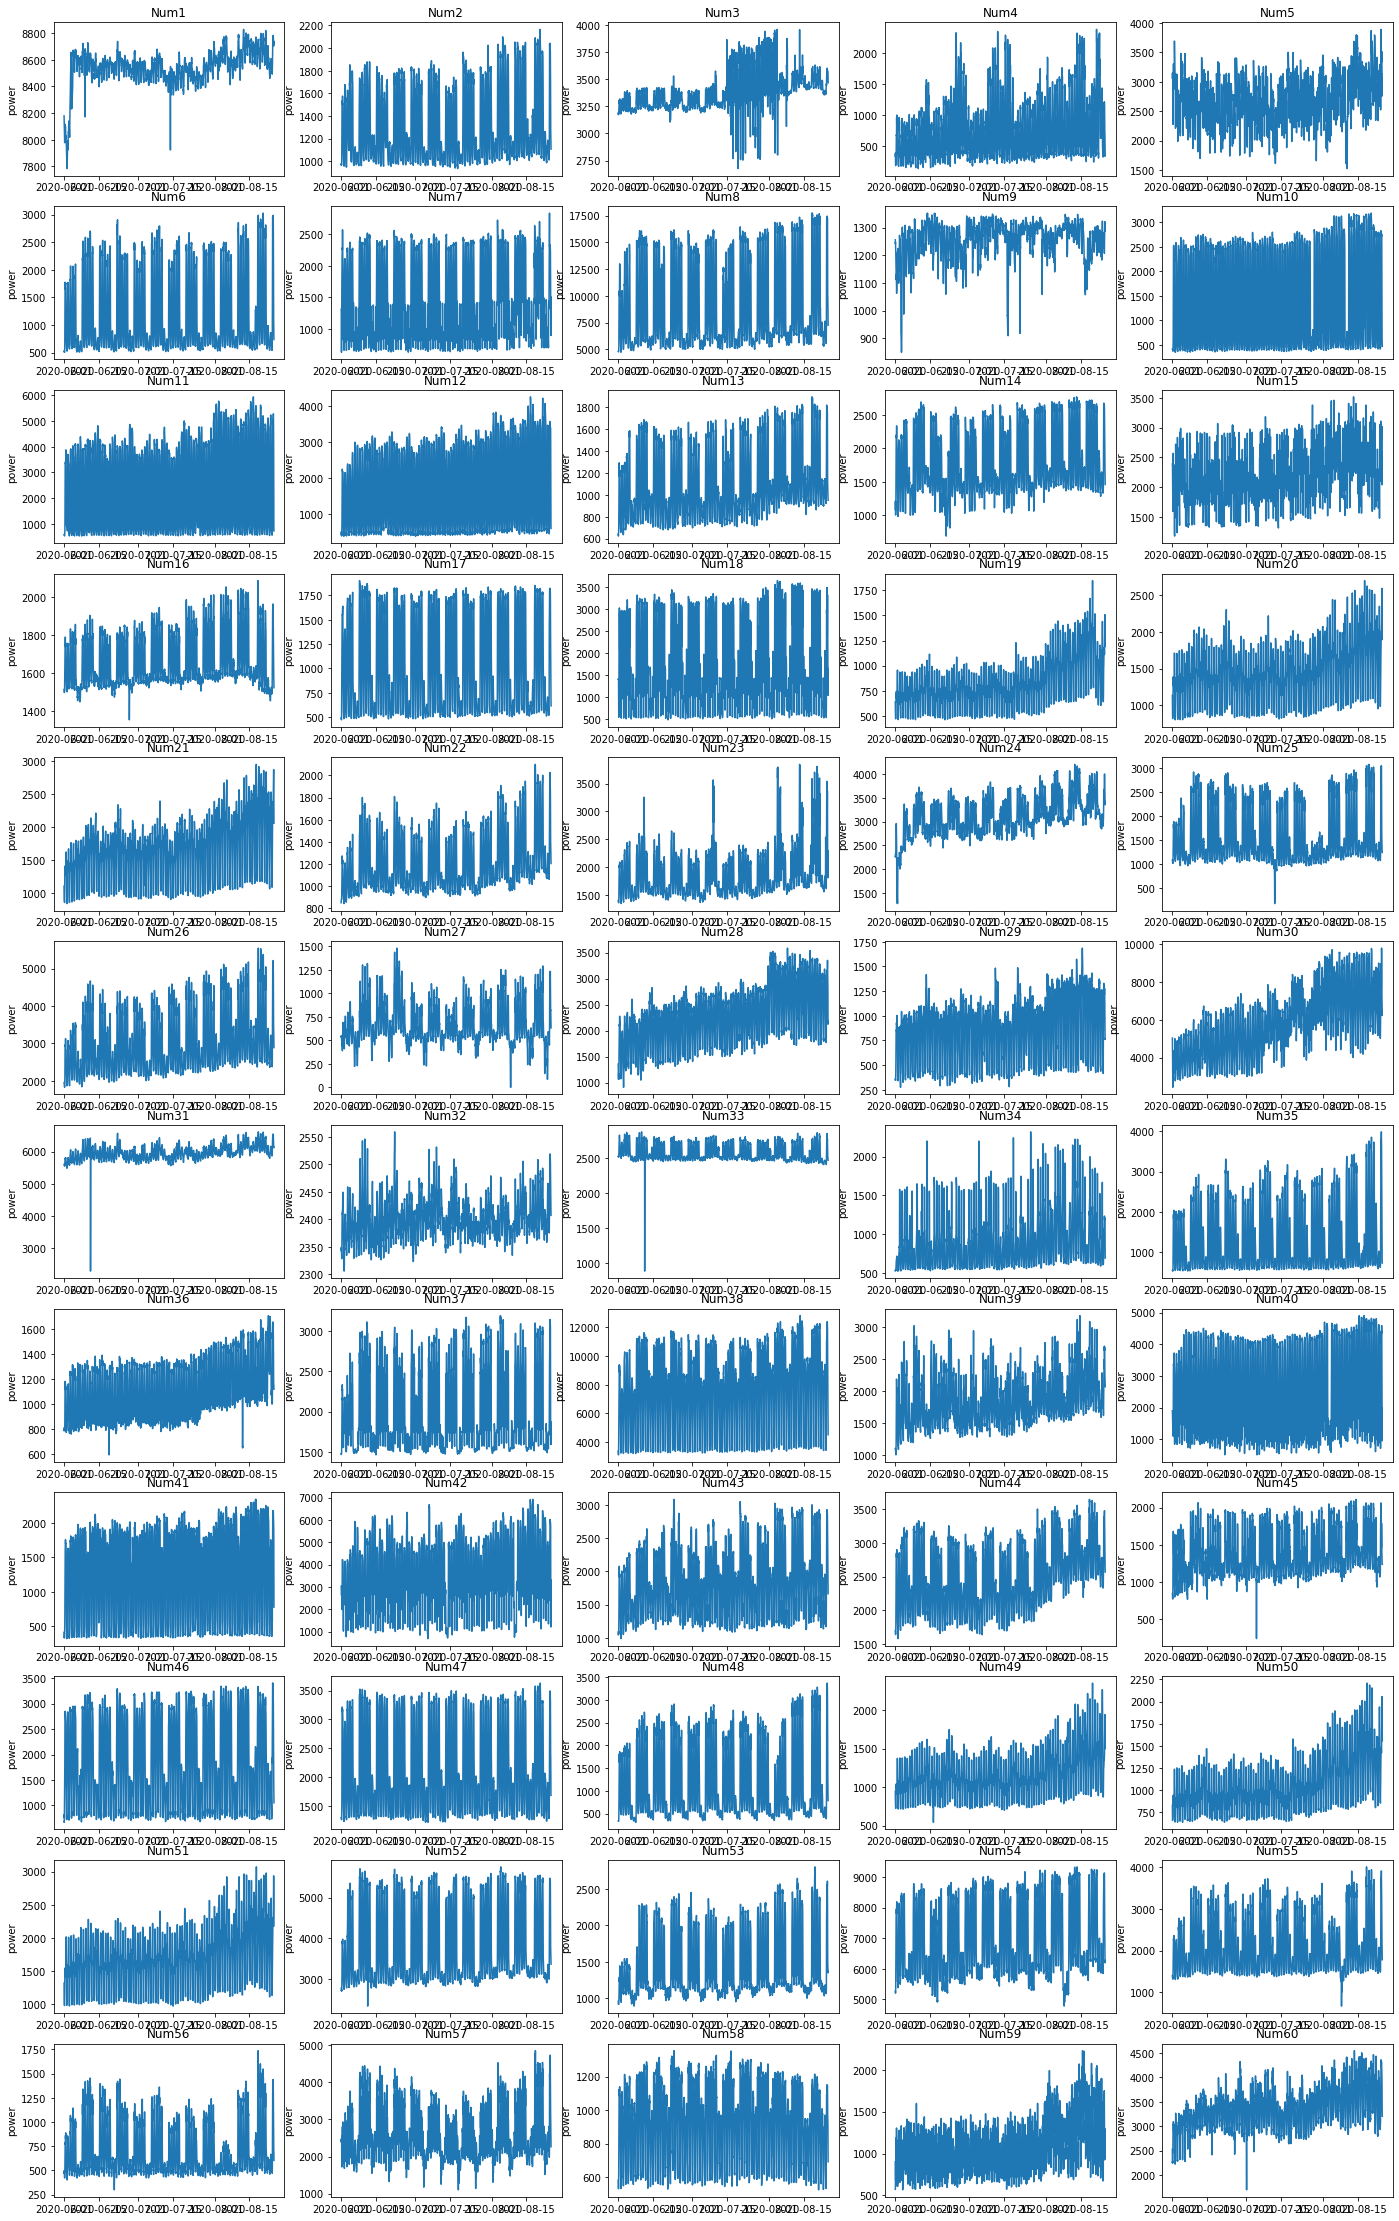

In [100]:
_, ax = plt.subplots(12, 5, figsize=(24, 40))
for i in range(12):
    for j in range(5):
        n = 5*i + j + 1
        title = "Num" + str(n)
        sns.lineplot(data=train[train.num == n], x='datetime', y='power', ax=ax[i][j])
        ax[i][j].set_title(title)
        ax[i][j].set_xlabel('')

plt.show()

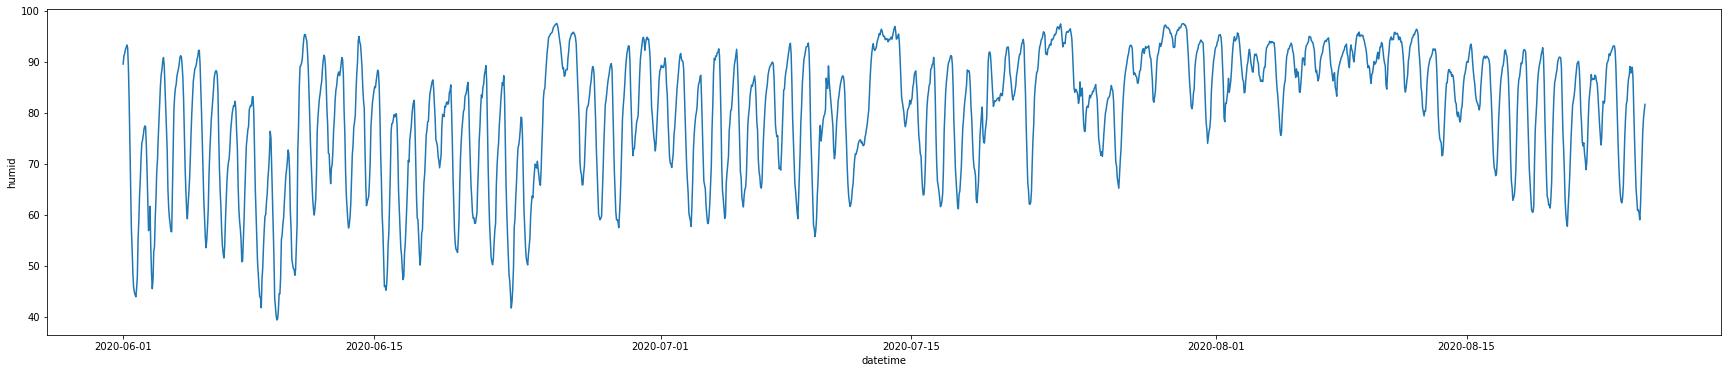

In [101]:
plt.figure(figsize=(30, 6))
sns.lineplot(data=train, x='datetime', y='humid', ci=None)

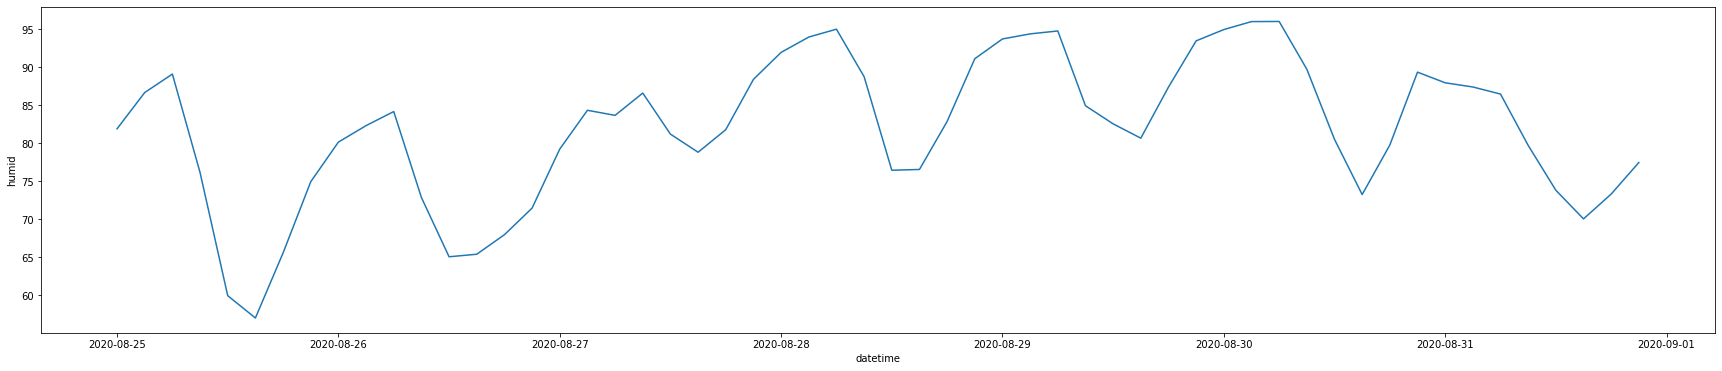

In [102]:
plt.figure(figsize=(30, 6))
sns.lineplot(data=test, x='datetime', y='humid', ci=None)

In [103]:
# temp	windspeed	humid	rain	insol
# linear interpolation
test[['temp', 'windspeed', 'humid', 'rain', 'insol']] = test[['temp', 'windspeed', 'humid', 'rain', 'insol']].interpolate(method='linear')
test

,num,datetime,temp,windspeed,humid,rain,insol,cooling,solarpanel
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,NaN,NaN
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,NaN,NaN
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,NaN,NaN
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,NaN,NaN
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,NaN,NaN
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,NaN,NaN
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,NaN,NaN


In [104]:
# 1) train에 있는 각 건물별로 cooling과 solarpanel이 같은지 체크
print(test.cooling.unique(), test.solarpanel.unique())

[nan  1.] [nan  1.]


In [105]:
# 아무 출력도 없으면 통과!
for n in train.num.unique():
    if len(train[train.num == n].cooling.unique()) == 1 and len(train[train.num == n].solarpanel.unique()) == 1:
        continue
    else:
        print("Different!")
        break

In [106]:
build_info = train[['num', 'cooling', 'solarpanel']].drop_duplicates() # 중복제거

In [107]:
test = pd.merge(test.drop(columns=['cooling', 'solarpanel']), build_info, on='num') # Inner Join!

In [108]:
test

,num,datetime,temp,windspeed,humid,rain,insol,cooling,solarpanel
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [109]:
# Time feature (derived feature)
def convert_dow(x):
    return x.dayofweek

def convert_hour(x):
    return x.hour

def is_weekend(x):
    return 1 if x.dt.dayofweek in [5, 6] else 0

train['dow'] = train.datetime.dt.dayofweek
train['hour'] = train.datetime.apply(convert_hour)

In [110]:
train.dow.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [111]:
train

,num,datetime,power,temp,windspeed,humid,rain,insol,cooling,solarpanel,dow,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,0,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,0,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,0,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,19
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,20
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,21
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,22


# 3. Data Preparation

In [112]:
train = train.drop(columns=['num', 'datetime'])

In [113]:
train

,power,temp,windspeed,humid,rain,insol,cooling,solarpanel,dow,hour
0,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0
1,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,0,1
2,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,0,2
3,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,0,3
4,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...
122395,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,19
122396,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,20
122397,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,21
122398,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,22


In [114]:
X = train.drop(columns=['power'])
y = train.power

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(110160, 9) (12240, 9) (110160,) (12240,)


# 4. Training

In [115]:
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor
from sklearn.preprocessing import StandardScaler
# x' = (x - mean(x)) / std(x)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

reg = LinearRegression()
reg2 = LGBMRegressor(random_state=42)

reg.fit(X_train_scaled, y_train)
reg2.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [116]:
pred_train = reg.predict(X_train_scaled)
pred_val = reg.predict(X_val_scaled)

pred_train2 = reg2.predict(X_train)
pred_val2 = reg2.predict(X_val)

𝑆𝑀𝐴𝑃𝐸=(100/𝑛)∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖||𝑦𝑖|+|𝑦̂ 𝑖|

In [117]:
def smape(origin, prediction):
    '''
    true: np.array 
    pred: np.array
    '''
    true = np.array(origin)
    pred = np.array(prediction)
    return 100 * np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) #100은 상수이므로 이번 코드에서는 제외

print("--------------- Linear Regression ---------------")
print("Train SMAPE : %.4f" % smape(y_train, pred_train))
print("Val SMAPE : %.4f" % smape(y_val, pred_val))
print()
print("--------------- LightGBM Regressor ---------------")
print("Train SMAPE : %.4f" % smape(y_train, pred_train2))
print("Val SMAPE : %.4f" % smape(y_val, pred_val2))

--------------- Linear Regression ---------------
Train SMAPE : 26.9769
Val SMAPE : 27.1041

--------------- LightGBM Regressor ---------------
Train SMAPE : 25.3527
Val SMAPE : 25.7786


### 6. Hyper-parameter Tuning

- GridSearchCV : 주어진 하이퍼파라미터 조합을 모두 테스트하는 방법

In [118]:
"""
<LightGBM Hyper-Parameters>

num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100,
subsample_for_bin: int = 200000, objective: Any | None = None, class_weight: Any | None = None,
min_split_gain: float = 0, min_child_weight: float = 0.001, min_child_samples: int = 20,
subsample: float = 1, subsample_freq: int = 0, colsample_bytree: float = 1, reg_alpha: float = 0,
reg_lambda: float = 0, random_state: Any | None = None, n_jobs: int = -1
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [50, 100, 200],         # default : 100
    'max_depth': [3, 5, 8, -1],             # default : -1
    'learning_rate': [0.001, 0.01, 0.1],    # default : 0.1 
    'num_leaves': [31, 127],                # default : 31
    'min_child_samples': [10, 20],          # default : 20
    'random_state': [42]
}

smape_score = make_scorer(smape)

gcv = GridSearchCV(LGBMRegressor(), param_grid, scoring=smape_score, verbose=1)
gcv.fit(X_train, y_train)
# print(gcv.cv_results_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 8, -1],
                         'min_child_samples': [10, 20],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 127], 'random_state': [42]},
             scoring=make_scorer(smape), verbose=1)

In [119]:
print(gcv.best_estimator_)

LGBMRegressor(learning_rate=0.001, max_depth=3, min_child_samples=10,
              n_estimators=50, random_state=42)


In [120]:
reg3 = LGBMRegressor(learning_rate=0.001, max_depth=3, min_child_samples=10,
                     n_estimators=50, random_state=42)
reg3.fit(X_train, y_train)
pred_train3 = reg3.predict(X_train)
pred_val3 = reg3.predict(X_val)

print("--------------- LightGBM Regressor(GridSearchCV) ---------------")
print("Train SMAPE : %.4f" % smape(y_train, pred_train3))
print("Val SMAPE : %.4f" % smape(y_val, pred_val3))

--------------- LightGBM Regressor(GridSearchCV) ---------------
Train SMAPE : 29.0676
Val SMAPE : 28.9865


# 7. Prediction & Submission

In [121]:
## To-do : test 데이터를 train 데이터와 같은 전처리를 적용해서 best_model로 예측한 값을 result라는 변수에 저장해주세요.

test['dow'] = test.datetime.dt.dayofweek
test['hour'] = test.datetime.apply(convert_hour)
test = test.drop(columns=['num', 'datetime'])

result = reg2.predict(test)

In [122]:
sample.answer = result
sample

,num_date_time,answer
0,1 2020-08-25 00,1831.718353
1,1 2020-08-25 01,1988.787098
2,1 2020-08-25 02,1833.624857
3,1 2020-08-25 03,1651.769578
4,1 2020-08-25 04,1909.036942
...,...,...
10075,60 2020-08-31 19,3240.703011
10076,60 2020-08-31 20,3010.364332
10077,60 2020-08-31 21,2493.796051
10078,60 2020-08-31 22,2027.861279


In [123]:
sample.to_csv(base_path + 'submission1.csv', index=False)

# Feature Engineering

In [126]:
# Holiday
def weekend(x):
    if x > 4:
        return 1
    else:
        return 0

train['weekend'] = train.dow.apply(weekend).unique()

array([0, 1])

# Building Grouping

In [124]:
group1 = [2,5,6,7,8,13,14,15,16,17,18,22,23,24,25,26,27,31,32,33,34,35,37,38,39,43,44,45,46,47,48,52,53,54,55,56,57] # LightGBM
group2 = [4,10,11,12,19,20,21,28,29,30,36,40,41,42,49,50,51,59] # LightGBM
group3 = [1,4,5,9,60] # RF
# 3번 건물은 group1으로 학습한 모델에 넣는 것으로 한다.